# Project: Medical Appointment 'No Show' Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset (from <a href="https://www.kaggle.com/joniarroba/noshowappointments">Kaggle</a>) contains information relating to over 100k medical appointments in Brazil. The data includes a number of variables (listed below), alongside whether each patient showed up for their medical appointment. Throughout the analysis the phrase 'no show' is used to refer to a patient who didn't show up to their appointment, whilst a 'show' refers to a patient who attended their appointment.

**Data:**

* PatientId - Identification number of patient
* AppointmentID - Identification number of appointment
* Gender - Male or Female
* ScheduledDay - Date that appointment was booked 
* AppointmentDay - Actual date of appointment
* Age - Age of patient
* Neighbourhood - Location of clinic where appointment takes place
* Scholarship - Whether or not patient is enrolled in Brasilian welfare program Bolsa Família (T/F)
* Hipertension - Whether or not the patient has hypertension (T/F)
* Diabetes - Whether or not the patient has diabetes (T/F)
* Alcoholism - Whether or not the patient has alcoholism (T/F)
* Handcap - The number of disabilites a patient has
* SMS_received - Whether or not they received an SMS reminder of the appointment (T/F)
* No-show - Whether the patient missed the appointment (T/F)

The purpose of this analysis is to determine which variables are the most important in predicting whether a patient will show up for their appointment. This analysis will focus on the following questions:

* How many patients miss their scheduled appointments?
* How have no show rates changed over time?
* Which gender is most likely to miss an appointment?
* Is age associated with the likelihood of missing an appointment?
* Do specific clinics have a higher no-show rate than others?
* Are patients enrolled in the scholarship program more likely to show up?
* Are patients more or less likely to show up when they are sent a SMS reminder?
* Does the waiting time between scheduling and attending an appointment have an impact on whether patients show up?
* How are alcoholism, diabetes and hypertension associated with the show up rate?
* How are disabilities associated with the show up rate?


Before exploring the dataset, I imported some useful modules for data analysis. I also included 'matplotlib inline' to ensure graphs displayed correctly, and applied a 'darkgrid' sns theme to customise the graph style.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

In order to explore the data, I first imported the csv file into the notebook, and displayed the first 5 lines.

In [2]:
df = pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I then used the shape and describe functions to examine the size of the dataset and some descriptive statistics. The dataset has 110,527 rows and 14 columns. I noticed that the age variable has a negative minimum value and made a note of this for subsequent data cleaning.

In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


I then used the info and duplicated function to check for null values and duplicated rows. There are no null values or duplicated rows in this dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
sum(df.duplicated())

0

I then used the histogram function to examine the distribution of the data for each variable. At this stage I decided that appointmentID and patientID were not relevant for analysis, and that I would remove them in the data cleaning step.

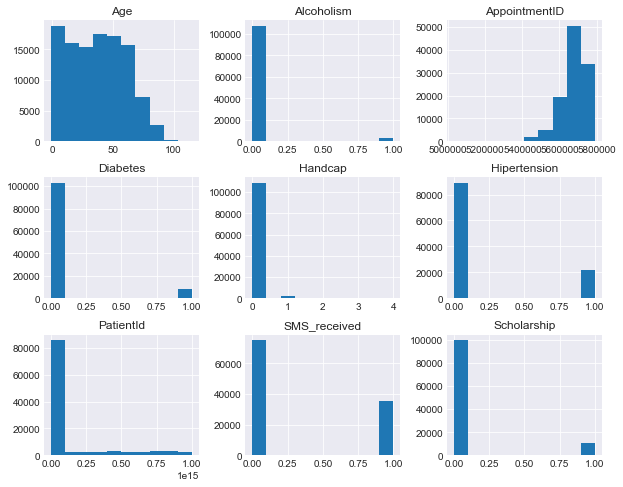

In [7]:
df.hist(figsize=(10, 8));

### Data Cleaning

Following the exploration of the data above, I decided to clean the dataset in the following ways:

* Drop PatientId and AppointmentID from the dataset because they are just random identifiers, and are not relevant for analysis.

In [8]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

* Correct typos identified in the column headers (Hipertension, Handcap) and remove hyphen from 'No-Show' to simplify subsequent coding.

In [9]:
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'noshow'}, inplace=True)

I then checked the data to ensure the changes had been made:

In [10]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I ran a query to filter the dataset to only rows where age was less than 0, to find the row number of the patient with an age of -1 that I had previously identified. I then dropped this patient from the dataset, and reran the query to ensure that it has been removed.

In [11]:
df.query('Age < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
df.drop(df.index[99832], inplace=True)
df.query('Age < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow


I then converted the 'ScheduledDay' and 'AppointmentDay' varibles into datetime format. Because the 'AppointmentDay' variable didn't have any time information (all rows had 00:00:00), I decided to add dt.date to both columns, so that they both only displayed date information.

In [13]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I then created a new column called 'WaitingTime' which calculates the number of days between the day the appointment was originally booked, and the actual date of the appointment. This is in order to later test the hypothesis that the longer a patient has to wait for an appointment, the less likely they are to show up.

In [14]:
df['WaitingTime'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow,WaitingTime
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


I then created a table to explore what values were held in the new 'WaitingTime' column.

In [15]:
df.groupby('WaitingTime')['WaitingTime'].count()

WaitingTime
-6          1
-1          4
 0      38562
 1       5213
 2       6725
 3       2737
 4       5290
 5       3277
 6       4037
 7       4906
 8       2332
 9       1605
 10      1391
 11       987
 12      1115
 13      1682
 14      2913
 15      1503
 16      1151
 17      1107
 18      1021
 19      1044
 20      1187
 21      1861
 22      1173
 23       822
 24       622
 25       637
 26       731
 27      1013
        ...  
 101        1
 102        4
 103        5
 104        8
 105        4
 107        2
 108        5
 109        5
 110        2
 111        5
 112        5
 115        2
 117        1
 119        4
 122        3
 123        1
 125        1
 126        1
 127        1
 132        1
 133       11
 139        1
 142        8
 146        1
 151        1
 155       10
 162       11
 169        8
 176       16
 179       10
Name: WaitingTime, Length: 131, dtype: int64

I noticed that 5 rows had negative values, which means that the appointment date was recorded as occurring before the date the appointment was scheduled. As this is impossible, I decided these rows must have been in error and dropped them from the dataset. I then reran the query to ensure these rows had been deleted.

In [16]:
df.query('WaitingTime < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow,WaitingTime
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [17]:
df.drop(df[df.WaitingTime < 0].index, inplace=True)
df.query('WaitingTime < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow,WaitingTime


<a id='eda'></a>
## Exploratory Data Analysis

### How many patients miss their scheduled appointments?

In [18]:
# Count the number of shows vs. no shows
noshows = df['noshow'].value_counts()
noshows

No     88207
Yes    22314
Name: noshow, dtype: int64

In [19]:
# Count the total number of patients
total = df['noshow'].count()
total

110521

In [20]:
# Calculate the percentage of shows vs. no shows
noshow_percentage = noshows['Yes']/total
show_percentage = noshows['No']/total

print(noshow_percentage)
print(show_percentage)

0.2018982817745044
0.7981017182254956


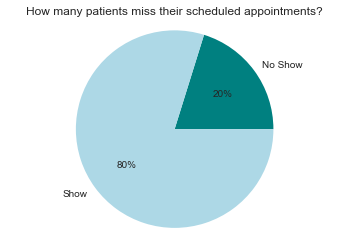

In [21]:
# Plot pie chart of show vs. no show percentages
plt.pie([noshow_percentage, show_percentage], labels = ['No Show', 'Show'], colors = ['teal', 'lightblue'], autopct='%1.0f%%')
plt.axis('equal')
plt.title('How many patients miss their scheduled appointments?');

The majority (80%, n=88,207) of patients showed up for their appointments, whilst 20% (n=22,314) were no shows.

### How have no show rates changed over time?

In [22]:
# Count the number of shows and noshows per day
apt_counts = df.groupby(['noshow', 'AppointmentDay']).count()['Age']

In [23]:
# Count the total number of appointments per day
total = apt_counts['Yes'] + apt_counts['No']

In [24]:
# Calculate the percentage of no shows
no_show_apt = apt_counts['Yes'] / total

# Reset the index and rename, so that the column can be referenced in the plot below
no_show_apt2 = no_show_apt.reset_index(name='No Show Rate')

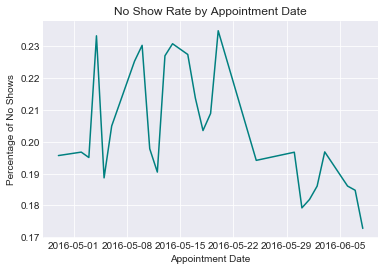

In [25]:
# Plot line chart of no show rate by date of appointment
plt.plot(no_show_apt2['AppointmentDay'], no_show_apt2['No Show Rate'], color='teal')
plt.xlabel('Appointment Date')
plt.ylabel('Percentage of No Shows')
plt.title('No Show Rate by Appointment Date')
plt.show()

The above chart illustrates that the no show rate fluctuates between 17% and 23% over the time period examined. The percentage of no shows appears to show a steady decrease since the 22nd of May, but the time period covered is too short to make any concrete conclusions about trends.

### Which gender is most likely to miss an appointment?

In [26]:
# Count the number of shows and noshows by gender
gender_counts = df.groupby(['Gender', 'noshow']).count()['Age']
gender_counts

Gender  noshow
F       No        57245
        Yes       14591
M       No        30962
        Yes        7723
Name: Age, dtype: int64

In [27]:
# Calculate the percentage of no shows by gender
female = gender_counts['F', 'Yes'] / df['Gender'].value_counts()['F']
male = gender_counts['M', 'Yes'] / df['Gender'].value_counts()['M']

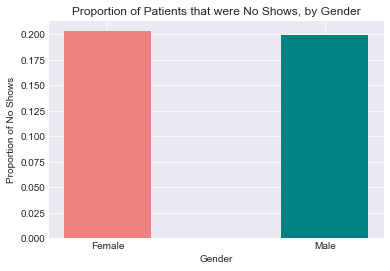

In [28]:
# Plot bar chart of no show rate by gender
plt.bar([1, 2], [female, male], width=0.4, color=['lightcoral', 'teal'])
plt.xlabel('Gender')
plt.ylabel('Proportion of No Shows')
plt.xticks([1, 2], ['Female', 'Male'])
plt.title('Proportion of Patients that were No Shows, by Gender');

Whilst women booked and attended more appointments than men, there was very little difference in the no show rate between the two genders.

### Is age associated with the likelihood of missing an appointment?

In [29]:
# Create bin edges for partitioning the data into age groups
bin_edges = [0, 5, 10, 20, 40, 60, 80, 115]

# Create labels for age groups
bin_names = ['<5', '5-9', '10-19', '20-39', '40-59', '60-79', '80+']

# Create the 'AgeGroup' column
df['AgeGroup'] = pd.cut(df['Age'], bin_edges, labels=bin_names, right=False, include_lowest=True)

# Check new column has been created
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow,WaitingTime,AgeGroup
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,60-79
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,40-59
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,60-79
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,5-9
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,40-59


In [30]:
# Count the number of shows vs. no shows for each age group
age_group_counts = df.groupby(['AgeGroup', 'noshow']).count()['Age']
age_group_counts

AgeGroup  noshow
<5        No         8377
          Yes        1865
5-9       No         5614
          Yes        1618
10-19     No         9679
          Yes        3256
20-39     No        22190
          Yes        6678
40-59     No        24416
          Yes        5656
60-79     No        15118
          Yes        2692
80+       No         2811
          Yes         546
Name: Age, dtype: int64

In [31]:
# Calculate the percentage of no shows for each age group
under5 = age_group_counts['<5', 'Yes'] / df['AgeGroup'].value_counts()['<5']
five_to_9 = age_group_counts['5-9', 'Yes'] / df['AgeGroup'].value_counts()['5-9']
ten_to_19 = age_group_counts['10-19', 'Yes'] / df['AgeGroup'].value_counts()['10-19']
twenty_to_39 = age_group_counts['20-39', 'Yes'] / df['AgeGroup'].value_counts()['20-39']
fourty_to_59 = age_group_counts['40-59', 'Yes'] / df['AgeGroup'].value_counts()['40-59']
sixty_to_79 = age_group_counts['60-79', 'Yes'] / df['AgeGroup'].value_counts()['60-79']
eighty_plus = age_group_counts['80+', 'Yes'] / df['AgeGroup'].value_counts()['80+']

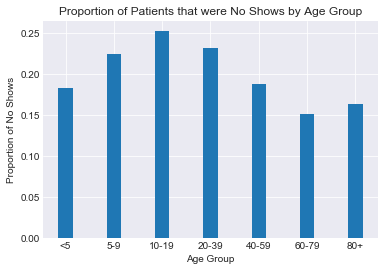

In [32]:
# Plot a bar chart showing the no show rate per age group
proportions = [under5, five_to_9, ten_to_19, twenty_to_39, fourty_to_59, sixty_to_79, eighty_plus]
plt.bar([1, 2, 3, 4, 5, 6, 7], proportions, width=0.3)
plt.xlabel('Age Group')
plt.ylabel('Proportion of No Shows')
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['<5', '5-9', '10-19', '20-39', '40-59', '60-79', '80+'])
plt.title('Proportion of Patients that were No Shows by Age Group');

The age group with the highest no show rate is the '10-19' group, whilst patients in the '<5' and '60+' age groups had a comparatively low no show rate.

### Do specific clinics have a higher no-show rate than others?

In [33]:
# Create a new dataframe filtered to only patients that were no shows
df_noshows = df.query('noshow == "Yes"')
# Count how many no shows there were per neighbourhood
df_noshows.groupby('Neighbourhood').count()['Age']

# Calculate what percentage the no show patients represent out of total patients in that neighbourhood
df_nb_percentage = df_noshows.groupby('Neighbourhood').count()['Age'] / df.groupby('Neighbourhood').count()['Age']

# Display the top 10 neighbourhoods by no show rate
df_nb_percentage.nlargest(n=10).reset_index(name='No Show Rate')

,Neighbourhood,No Show Rate
0,ILHAS OCEÂNICAS DE TRINDADE,1.000000
1,SANTOS DUMONT,0.289185
2,SANTA CECÍLIA,0.274554
3,SANTA CLARA,0.264822
4,ITARARÉ,0.262664
5,JESUS DE NAZARETH,0.243954
6,HORTO,0.240000
7,ILHA DO PRÍNCIPE,0.234775
8,CARATOÍRA,0.230409
9,ANDORINHAS,0.230327


In [34]:
# Calculate average no show rate across all neighbourhoods
df_nb_percentage.mean()

0.20797518616168098

The neighbourhoods with the highest no show rate are displayed in the table above. Clinics in Santos Dumont (29%), Santa Cecilia (27%) and Santa Clara (26%) have the highest no show rate, which is higher than the average no show rate of 21%. The no show rate of 100% at ILHAS OCEÂNICAS DE TRINDADE should be discounted because the sample size is only 2 patients.

### Are patients enrolled in the scholarship program more likely to show up?

In [35]:
# Count the number of shows vs. no shows, broken down by scholarship enrollment status
schol_counts = df.groupby(['Scholarship', 'noshow']).count()['Age']
schol_counts

Scholarship  noshow
0            No        79924
             Yes       19736
1            No         8283
             Yes        2578
Name: Age, dtype: int64

In [36]:
# Calculate the percentage of no shows by scholarship enrollment status
non_scholarship = schol_counts[0, 'Yes'] / df['Scholarship'].value_counts()[0]
scholarship = schol_counts[1, 'Yes'] / df['Scholarship'].value_counts()[1]

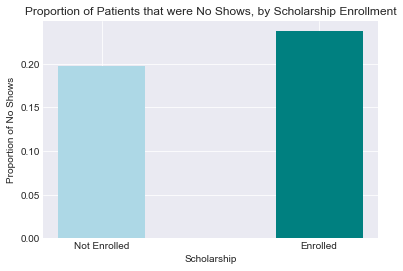

In [37]:
# Plot a bar chart showing the no show rate, broken down by scholarship enrollment status
plt.bar([1, 2], [non_scholarship, scholarship], width=0.4, color=['lightblue', 'teal'])
plt.xlabel('Scholarship')
plt.ylabel('Proportion of No Shows')
plt.xticks([1, 2], ['Not Enrolled', 'Enrolled'])
plt.title('Proportion of Patients that were No Shows, by Scholarship Enrollment');

Patients who were enrolled in the scholarship program were slightly more likely to not show up to their appointments (24%) than those not enrolled (20%).

### Are patients more likely to show up when they are sent a SMS reminder?

In [38]:
# Count the number of shows vs. no shows, broken down by whether patients were sent an SMS
SMS_counts = df.groupby(['SMS_received', 'noshow']).count()['Age']
SMS_counts

SMS_received  noshow
0             No        62509
              Yes       12530
1             No        25698
              Yes        9784
Name: Age, dtype: int64

In [39]:
# Calculate the percentage of no shows, broken down by whether patients were sent an SMS
non_SMS = SMS_counts[0, 'Yes'] / df['SMS_received'].value_counts()[0]
SMS = SMS_counts[1, 'Yes'] / df['SMS_received'].value_counts()[1]

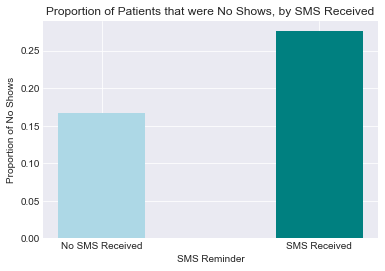

In [40]:
# Plot a bar chart showing the no show rate, broken down by whether patients were sent an SMS
plt.bar([1, 2], [non_SMS, SMS], width=0.4, color=['lightblue', 'teal'])
plt.xlabel('SMS Reminder')
plt.ylabel('Proportion of No Shows')
plt.xticks([1, 2], ['No SMS Received', 'SMS Received'])
plt.title('Proportion of Patients that were No Shows, by SMS Received');

Counterintuitively, patients who were sent an SMS reminder about their appointment were less likely to show up to their appointment (28%) than those who did not receive an SMS (17%).

### Does the waiting time between scheduling and attending an appointment affect whether patients show up?

In [41]:
# Create dataset masks for show and no show patients
df_noshows = df.query('noshow == "Yes"')
df_shows = df.query('noshow == "No"')

In [42]:
# Calculate average waiting time for no show patients
df_noshows.WaitingTime.mean()

15.835484449224701

In [43]:
# Calculate average waiting time for show patients
df_shows.WaitingTime.mean()

8.754758692620767

In [44]:
# Calculate median waiting time for no show patients
df_noshows.WaitingTime.median()

11.0

In [45]:
# Calculate median waiting time for show patients
df_shows.WaitingTime.median()

2.0

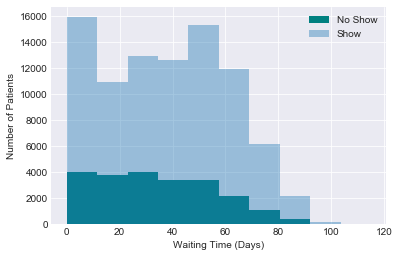

In [46]:
# Plot a histogram showing the distribution of waiting times for show vs. no show patients
df_noshows['Age'].hist(label='No Show', color='teal')
df_shows['Age'].hist(alpha = 0.4, label='Show')
plt.xlabel('Waiting Time (Days)')
plt.ylabel('Number of Patients')
plt.legend();

The average waiting time for a no show patient is 16 days, which is nearly double that of a patient that shows up to their appointment (9 days). The median waiting time for a no show patient is 11 days, compared to 2 days for patients that show up. This is quite a marked difference, which warrants further statistical analysis.

### How are alcoholism, diabetes and hypertension associated with the show up rate?

In [47]:
# Count the number of shows vs. no shows, by whether or not a patient has hypertension
hypertension_counts = df.groupby(['Hypertension', 'noshow']).count()['Age']

# Calculate the percentage of no shows, broken down by whether or not a patient has hypertension
non_hypertensive = hypertension_counts[0, 'Yes'] / df['Hypertension'].value_counts()[0]
hypertensive = hypertension_counts[1, 'Yes'] / df['Hypertension'].value_counts()[1]

In [48]:
# Count the number of shows vs. no shows, by whether or not a patient has diabetes
diabetes_counts = df.groupby(['Diabetes', 'noshow']).count()['Age']

# Calculate the percentage of no shows, broken down by whether or not a patient has diabetes
non_diabetic = diabetes_counts[0, 'Yes'] / df['Diabetes'].value_counts()[0]
diabetic = diabetes_counts[1, 'Yes'] / df['Diabetes'].value_counts()[1]

In [49]:
# Count the number of shows vs. no shows, by whether or not a patient is an alcoholic
alcoholism_counts = df.groupby(['Alcoholism', 'noshow']).count()['Age']

# Calculate the percentage of no shows, broken down by whether or not a patient is an alcoholic
non_alcoholic = alcoholism_counts[0, 'Yes'] / df['Alcoholism'].value_counts()[0]
alcoholic = alcoholism_counts[1, 'Yes'] / df['Alcoholism'].value_counts()[1]

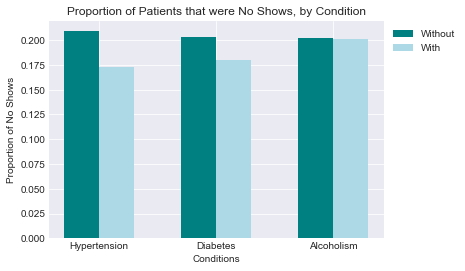

In [50]:
# Create a bar chart showing the no show rate, broken down by the various conditions
ind = np.array([1, 2, 3])
width = 0.3
plt.bar(ind, [non_hypertensive, non_diabetic, non_alcoholic], width=width, color='teal', label='Without')
plt.bar(ind+width, [hypertensive, diabetic, alcoholic], width=width, color='lightblue', label='With')

plt.xlabel('Conditions')
plt.ylabel('Proportion of No Shows')

locations = ind + width / 2
plt.xticks(locations, ['Hypertension', 'Diabetes', 'Alcoholism'])
plt.title('Proportion of Patients that were No Shows, by Condition')

plt.legend(bbox_to_anchor=(1,1));

The no show rate is slightly lower for those patients with hypertension and diabetes, compared to patients without these conditions. It makes sense that patients with serious medical conditions would be less likely to miss their medical appointments, but the association was not as strong as could be expected. There is very little difference in the no show rate between alcoholic and non-alcoholic patients.

### How are disabilities associated with the show up rate?

In [51]:
# Count the number of shows vs. no shows, by whether or not a patient has a disability
handicap_counts = df.groupby(['Handicap', 'noshow']).count()['Age']
handicap_counts

Handicap  noshow
0         No        86373
          Yes       21909
1         No         1676
          Yes         364
2         No          146
          Yes          37
3         No           10
          Yes           3
4         No            2
          Yes           1
Name: Age, dtype: int64

In [52]:
# Calculate the percentage of no shows, broken down by how many disabilities a patient has
no_handicap = handicap_counts[0, 'Yes'] / df['Handicap'].value_counts()[0]
one_handicap = handicap_counts[1, 'Yes'] / df['Handicap'].value_counts()[1]
two_handicaps = handicap_counts[2, 'Yes'] / df['Handicap'].value_counts()[2]
three_handicaps = handicap_counts[3, 'Yes'] / df['Handicap'].value_counts()[3]
four_handicaps = handicap_counts[4, 'Yes'] / df['Handicap'].value_counts()[4]

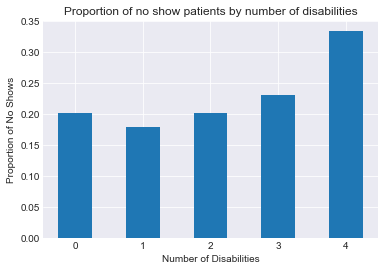

In [53]:
# Create a bar chart showing the no show rate, broken down by how many disabilities a patient has
plt.bar([1, 2, 3, 4, 5], [no_handicap, one_handicap, two_handicaps, three_handicaps, four_handicaps], width=0.5)
plt.xlabel('Number of Disabilities')
plt.ylabel('Proportion of No Shows')
plt.xticks([1, 2, 3, 4, 5], ['0', '1', '2', '3', '4'])
plt.title('Proportion of no show patients by number of disabilities');

There is not a very big variance in the no show rates of patients with between 0 and 3 disabilities (18-23%), but those patients with 4 disabilities have a higher no show rate of 33%. However, it should be noted that the sample size in the '4 disabilites' group is very small (n=3) and we should therefore be careful not to draw any strong conclusions from this.

<a id='conclusions'></a>
## Conclusions

20% of patients in this dataset did not show up for their appointments. Analysis has revealed that the following variables have the strongest potential to predict no shows. It should be noted that this is not a statistical analysis and therefore the following findings are tentative.

* **Waiting Time** - Waiting time appears to have the strongest association with the no show rate of all the variables in this analysis. The average waiting time for a no show patient is 16 days, which is nearly double that of a patient that shows up to their appointment (9 days). This is quite a marked difference, which warrants further statistical analysis.


* **SMS** - Counterintuitively, patients who were sent an SMS reminder about their appointment were less likely to show up to their appointment (28%) than those who did not receive an SMS (17%). It is not known why this is the case, but this also warrants further investigation.


* **Age** - There was an association between age group and no show rate, with the highest no show rate found in the '10-19' age group. Patients in the '<5' and '60+' age groups had a comparatively low no show rate. It could be hypothesised that this might be due to these being more 'at risk' age groups when it comes to health issues.


* **Neighbourhoods** - Clinics in specific neighbourhoods (Santos Dumont (29%), Santa Cecilia (27%) and Santa Clara (26%)) were found to have higher no show rates than average (21%). It is not known whether these neighbourhoods are located in close proximity, or whether these areas have similar demographic profiles - but this should be considered in future analysis.


* **Scholarship** - Patients who were enrolled in the scholarship program were slightly less likely to show up to their appointments (24%) than those not enrolled (20%). It is not known why this is the case, but this warrants further investigation.


The following variables did not have a strong association with the no show rate: disabilities, health conditions.

The following variables did not appear to be associated with no show rate: gender, alcoholism.



**Limitations**

* The above analysis is limited by the size of data set, both in terms of the number of patients and the time period the dataset covers. The dataset only covers a period of just over one month, but a dataset over a longer time period would allow for analysis of the direction of the trend in the no show rate, to show whether the problem is improving or worsening. A larger sample size would also allow for stronger conclusions.


* Statistical analysis will allow for statistical signficance to be calculated and for us to draw more rigorous conclusions.